<h1>Assessment - App Rating Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

<h2>1.	Load the data file using pandas. </h2>

In [2]:
# Load the data file.
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 13)

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h2>2.	Check for null values in the data. Get the number of null values for each column.</h2>

In [7]:
df.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<h2>3.	Drop records with nulls in any of the columns. </h2>

In [8]:
df = df.dropna()

In [9]:
df.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<h1>Cleaning Data </h1>

<h2>Column "Size"</h2>

In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [12]:
df['Size'] = df['Size'].replace("Varies with device",np.nan)
df['Size'] = df['Size'].str.replace("M","000")
df['Size'] = df['Size'].str.replace("k","")
df['Size'] = df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

<h2>Column "Reviews"</h2>

In [13]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [15]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

<h2>Column "Installs"</h2>

In [16]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [17]:
df['Installs'] = df['Installs'].str.replace("+","")
df['Installs'] = df['Installs'].str.replace(",","")

In [18]:
df['Installs'] = df['Installs'].astype(int)
df['Installs'].dtype

dtype('int64')

In [19]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

<h2>Column "Price"</h2>

In [20]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [21]:
df['Price'] = df['Price'].str.replace("$","")
df['Price'] = df['Price'].astype(float)
df['Price'].dtype

dtype('float64')

<h1>Sanity Checks</h1>

<h2>1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.</h2>

In [22]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [23]:
df['Rating'].dtype

dtype('float64')

In [24]:
df.shape

(9360, 13)

<h2>2.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.</h2>

In [25]:
df[df['Installs']<df['Reviews']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,NaN,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4.2,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [26]:
drop = df[(df['Installs']<df['Reviews'])].index
df.drop(drop, inplace = True)

In [27]:
df.shape

(9353, 13)

<h2>3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.</h2>

In [28]:
df[(df['Type']=="Free") & (df['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df.to_csv('file1.csv')

<h1>Performing univariate analysis</h1>

<AxesSubplot:xlabel='Price'>

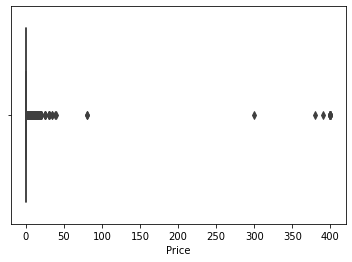

In [30]:
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Reviews'>

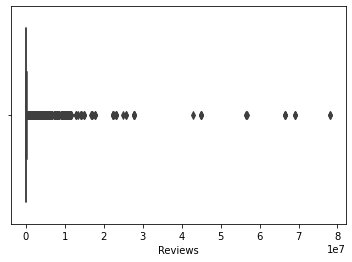

In [31]:
sns.boxplot(df['Reviews'])

<AxesSubplot:ylabel='Frequency'>

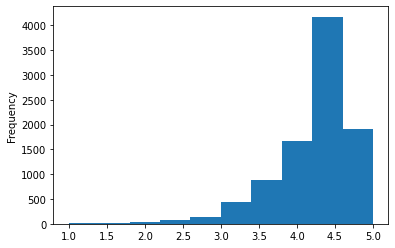

In [32]:
df.Rating.plot.hist()

<AxesSubplot:ylabel='Frequency'>

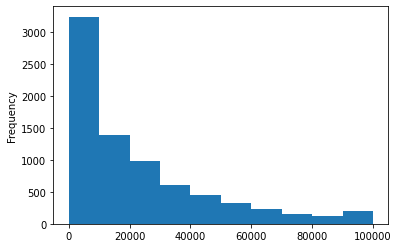

In [33]:
df.Size.plot.hist()

<h1>Outlier treatment: </h1>

<h2>1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!</h2>

<h3>1.	Check out the records with very high price</h3>

In [34]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<h3>2.	Drop these as most seem to be junk apps</h3>

In [35]:
drop2 = df[(df['Price']>200)].index
df.drop(drop2, inplace = True)

In [36]:
df.shape

(9338, 13)

<h2>2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.</h2>

In [37]:
df[df['Reviews']>=2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098.0,NaN,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [38]:
drop3 = df[(df['Reviews']>=2000000)].index
df.drop(drop3, inplace = True)

In [39]:
df.shape

(8885, 13)

<h2>3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.</h2>

<h3>1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99 </h3>

In [40]:
df.Installs.quantile([.10, .25, .50, .70, .90, .95, .99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [41]:
drop4 = df[(df['Installs']>=10000000.0)].index
df.drop(drop4, inplace = True)

<h1>Bivariate analysis</h1>

<h2>1.Scatter plot for Rating vs. Price</h2>

(0.0, 84.0039431359234)

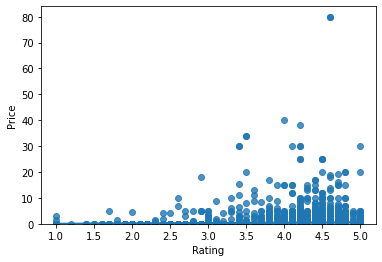

In [42]:
sns.regplot(x="Rating", y="Price", data=df)
plt.ylim(0,)

<h2>2.Scatter plot for Rating vs. Size</h2>

(0.0, 104999.95)

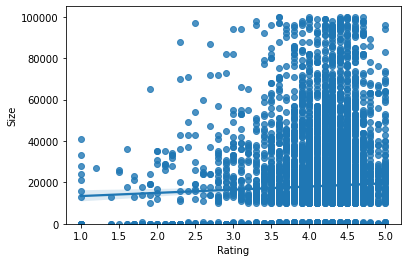

In [43]:
sns.regplot(x="Rating", y="Size", data=df)
plt.ylim(0,)

<h2>3.Scatter plot for Rating vs. Reviews</h2>

(0.0, 942047.8830273626)

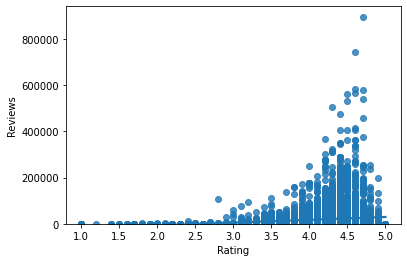

In [44]:
sns.regplot(x="Rating", y="Reviews", data=df)
plt.ylim(0,)

<h2>4.Box plot for Rating vs. Content Rating </h2>

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

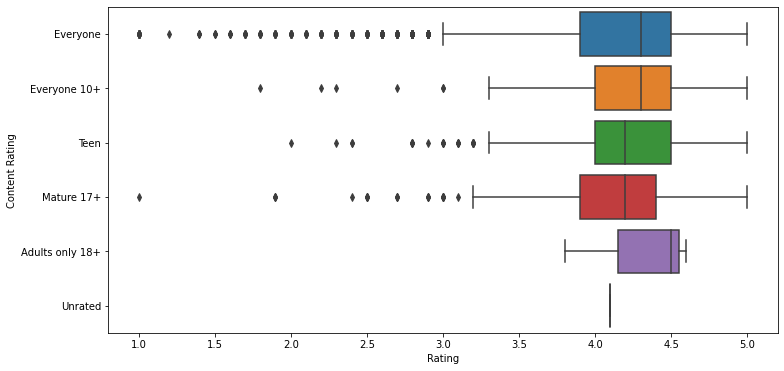

In [45]:
plt.figure(figsize=[12,6])
sns.boxplot("Rating", "Content Rating", data=df)

<h2>5.Box plot for Rating vs. Category </h2>

<AxesSubplot:xlabel='Rating', ylabel='Category'>

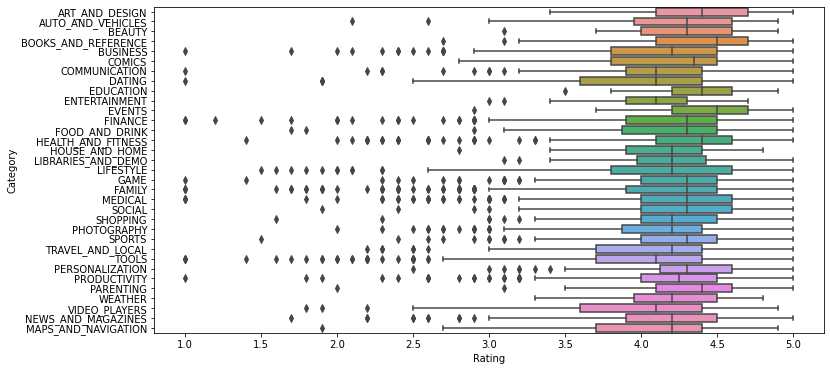

In [46]:
plt.figure(figsize=[12,6])
sns.boxplot("Rating", "Category", data=df)

<h1>Data preprocessing</h1>

In [47]:
inp1 = df.copy()

In [48]:
inp1["Reviews"] = np.log1p(df["Reviews"])

In [49]:
inp1["Installs"] = np.log1p(df["Installs"])

In [50]:
#lm = LinearRegression()
#lm.fit(inp1[["Reviews"]], inp1[["Installs"]])

In [51]:
# Slope 
#lm.coef_

In [52]:
# Intercept
#lm.intercept_

In [53]:
inp1 = df.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1)

In [55]:
inp2 = inp1.copy()
cat_cols = ['Category', 'Genres', 'Content Rating']
inp2 = pd.get_dummies(inp2, columns=cat_cols, drop_first=True)
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=152)

In [56]:
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000.0,10000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967.0,14000.0,500000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510.0,8.7,5000000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967.0,2.8,100000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167.0,5.6,50000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
 = train_test_split(inp2, train_size = 0.7, random_state = 100)
x_train, x_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.15, random_state=1)